Using this dataset to build a model to predict the collection of the movies

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("C:/Users/sairam/Downloads/Movie_regression.csv")

In [6]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [8]:
df['Time_taken'].fillna(df.Time_taken.mean(),inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [10]:
df=pd.get_dummies(df,columns=['3D_available','Genre'],drop_first=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  Time_taken           506 non-null    float64
 12  Twitter_hastags      506 non-null    float64
 13  Avg_age_actors       506 non-null    int64  
 14  Num_multiplex        506 non-null    int64  
 15  Collection           506 non-null    int

In [12]:
from sklearn import tree

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x=df.loc[:,df.columns!='Collection']
y=df['Collection']

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)

In [17]:
rf_tree=tree.DecisionTreeRegressor(max_depth=3)

In [18]:
rf_tree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [20]:
y_train_pred=rf_tree.predict(x_train)
y_test_pred=rf_tree.predict(x_test)

In [33]:
from sklearn.metrics import mean_squared_error,r2_score

In [22]:
mse=mean_squared_error(y_train,y_train_pred)

In [23]:
mse

51775560.360643305

In [24]:
mse1=mean_squared_error(y_test,y_test_pred)

In [25]:
mse1

149453434.7275152

In [34]:
r2_score(y_train,y_train_pred)

0.8456929558822828

In [35]:
r2_score(y_test,y_test_pred)

0.5612128719858749

In [26]:
dot_file=tree.export_graphviz(rf_tree,feature_names=x_train.columns)

In [27]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [29]:
import pydotplus

In [30]:
graph=pydotplus.graph_from_dot_data(dot_file)

In [31]:
from IPython.display import Image

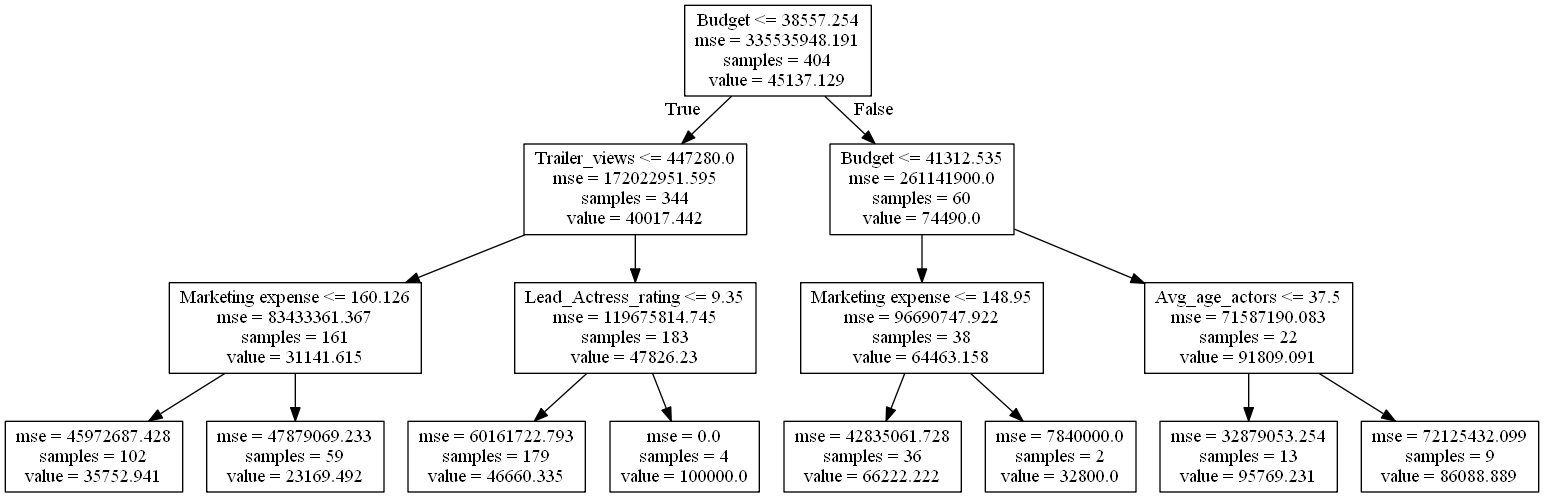

In [32]:
Image(graph.create_png())

In [47]:
rf_tree1=tree.DecisionTreeRegressor(min_samples_split=39,max_depth=3)

In [48]:
rf_tree1.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3, min_samples_split=39)

In [49]:
y_train_pred1=rf_tree1.predict(x_train)
y_test_pred1=rf_tree1.predict(x_test)

In [50]:
r2_score(y_train,y_train_pred1)

0.8264030852051256

In [51]:
r2_score(y_test,y_test_pred1)

0.6246129571721691

In [52]:
mse=mean_squared_error(y_train,y_train_pred1)
mse

58248005.40879183

In [53]:
mse1=mean_squared_error(y_test,y_test_pred1)
mse1

127858998.86520402

In [54]:
dot_file1=tree.export_graphviz(rf_tree1,feature_names=x_train.columns)

In [55]:
graph1=pydotplus.graph_from_dot_data(dot_file1)

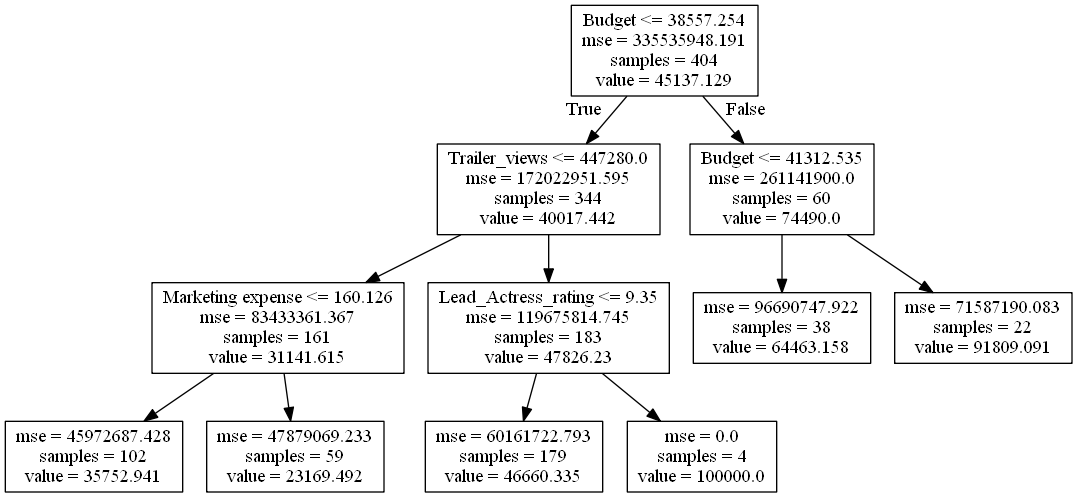

In [56]:
Image(graph1.create_png())

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
rg_f=RandomForestRegressor(n_estimators=10)

In [59]:
rg_f.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10)

In [60]:
r2_score(y_train,rg_f.predict(x_train))

0.9688157124106915

In [61]:
r2_score(y_test,rg_f.predict(x_test))

0.8230312955866623

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
rg_f1=RandomForestRegressor(n_estimators=100)

In [71]:
param_grid={'n_estimators':[200,250,300],'min_samples_split':[2,4,9,14],'max_features':[4,5,6,7,9]}

In [72]:
grid=GridSearchCV(rg_f1,param_grid,cv=5,scoring='r2')

In [73]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [4, 5, 6, 7, 9],
                         'min_samples_split': [2, 4, 9, 14],
                         'n_estimators': [200, 250, 300]},
             scoring='r2')

In [74]:
grid.best_params_

{'max_features': 9, 'min_samples_split': 2, 'n_estimators': 300}

In [75]:
grid.best_estimator_

RandomForestRegressor(max_features=9, n_estimators=300)

In [77]:
final_model=grid.best_estimator_

In [79]:
r2_score(y_train,final_model.predict(x_train))

0.9812521776499864

In [80]:
r2_score(y_test,final_model.predict(x_test))

0.8529684948155053